In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

In [2]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import pickle

from chemistry import Molecule
from util import score
from pprint import pprint


In [3]:
with open('../data/molecules.pickle', 'rb') as f:
    molecules = pickle.load(f)

In [4]:
structures = pd.read_feather('../data/structures_enh.feather')
labelled = pd.read_feather('../data/train.feather')
unlabelled = pd.read_feather('../data/test.feather')

In [24]:
from models import SKModel, partition_data

#data_df = labelled[labelled.type == '1JHC'].head(10)
data_df = labelled.head(1000)
train_df, test_df = partition_data(data_df, train_frac=1)
train_df = train_df.copy()
        
model = SKModel(molecules=molecules,
                structures=structures)
model.corr(train_df, train_df)

,id,atom_index_0,atom_index_1,scalar_coupling_constant,coupling_distance,coupling_2JHC,coupling_3JHC,coupling_3JHN,coupling_3JHH,coupling_2JHH,...,atom3_dist_to_mean,bond01_dist,bond01_valency,bond01_strength,bond12_dist,bond12_valency,bond12_strength,bond23_dist,bond23_valency,bond23_strength
id,1.000000,0.406918,0.041697,-0.016962,0.067661,0.018827,0.162437,0.028436,-0.068887,-0.101490,...,-0.030019,-0.074390,NaN,0.011294,0.071836,0.050569,0.029803,0.118942,0.049380,0.045188
atom_index_0,0.406918,1.000000,0.011735,0.021135,-0.006924,0.083225,0.192058,-0.014270,-0.154246,-0.152721,...,0.013666,0.033633,NaN,0.091144,0.043758,0.033210,0.003153,0.080783,0.021872,0.004759
atom_index_1,0.041697,0.011735,1.000000,-0.327123,-0.036851,-0.348418,-0.222570,-0.045511,0.637619,0.468013,...,-0.021266,0.088245,NaN,-0.011439,0.269809,0.241408,0.338199,0.178053,0.223684,0.310136
scalar_coupling_constant,-0.016962,0.021135,-0.327123,1.000000,0.013192,-0.275695,-0.188320,-0.078778,-0.157887,-0.311294,...,0.008029,0.041626,NaN,-0.034784,-0.873809,-0.757886,-0.838291,-0.295839,-0.271669,-0.283859
coupling_distance,0.067661,-0.006924,-0.036851,0.013192,1.000000,-0.004834,-0.000264,0.017818,-0.021292,0.000928,...,-0.026026,0.037910,NaN,0.005280,0.001600,-0.046344,-0.038371,-0.010891,-0.000282,-0.006983
coupling_2JHC,0.018827,0.083225,-0.348418,-0.275695,-0.004834,1.000000,-0.277336,-0.097382,-0.247755,-0.233922,...,0.053016,-0.016335,NaN,0.020310,0.353985,0.280486,0.253042,-0.438610,-0.404378,-0.424641
coupling_3JHC,0.162437,0.192058,-0.222570,-0.188320,-0.000264,-0.277336,1.000000,-0.085057,-0.216399,-0.204317,...,-0.038428,-0.102779,NaN,0.073843,0.300317,0.263796,0.229267,0.741204,0.630436,0.575454
coupling_3JHN,0.028436,-0.014270,-0.045511,-0.078778,0.017818,-0.097382,-0.085057,1.000000,-0.075984,-0.071742,...,-0.049153,0.033057,NaN,-0.013623,0.103323,0.058026,0.057091,0.210446,0.172678,0.133202
coupling_3JHH,-0.068887,-0.154246,0.637619,-0.157887,-0.021292,-0.247755,-0.216399,-0.075984,1.000000,-0.182524,...,-0.014890,-0.008600,NaN,0.023855,0.290219,0.147628,0.143896,0.404247,0.439321,0.576349
coupling_2JHH,-0.101490,-0.152721,0.468013,-0.311294,0.000928,-0.233922,-0.204317,-0.071742,-0.182524,1.000000,...,0.008287,0.078271,NaN,-0.039544,-0.014753,0.139385,0.300104,-0.323129,-0.297909,-0.312837


In [25]:
labelled.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807602
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254800
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807404


Training 5835 samples for 1JHC
1JHC score: 1.6914411293112392 (trained on 5835 elements)
Training 468 samples for 1JHN
1JHN score: 0.9976357222659366 (trained on 468 elements)
Training 8262 samples for 2JHC
2JHC score: 0.6035006631620353 (trained on 8262 elements)
Training 3786 samples for 2JHH
2JHH score: 0.6420747936784577 (trained on 3786 elements)
Training 912 samples for 2JHN
2JHN score: 0.3058946740916426 (trained on 912 elements)
Training 10052 samples for 3JHC
3JHC score: 0.7893667488135346 (trained on 10052 elements)
Training 4414 samples for 3JHH
3JHH score: 1.072496270822781 (trained on 4414 elements)
Training 1266 samples for 3JHN
3JHN score: -0.14614290948847702 (trained on 1266 elements)


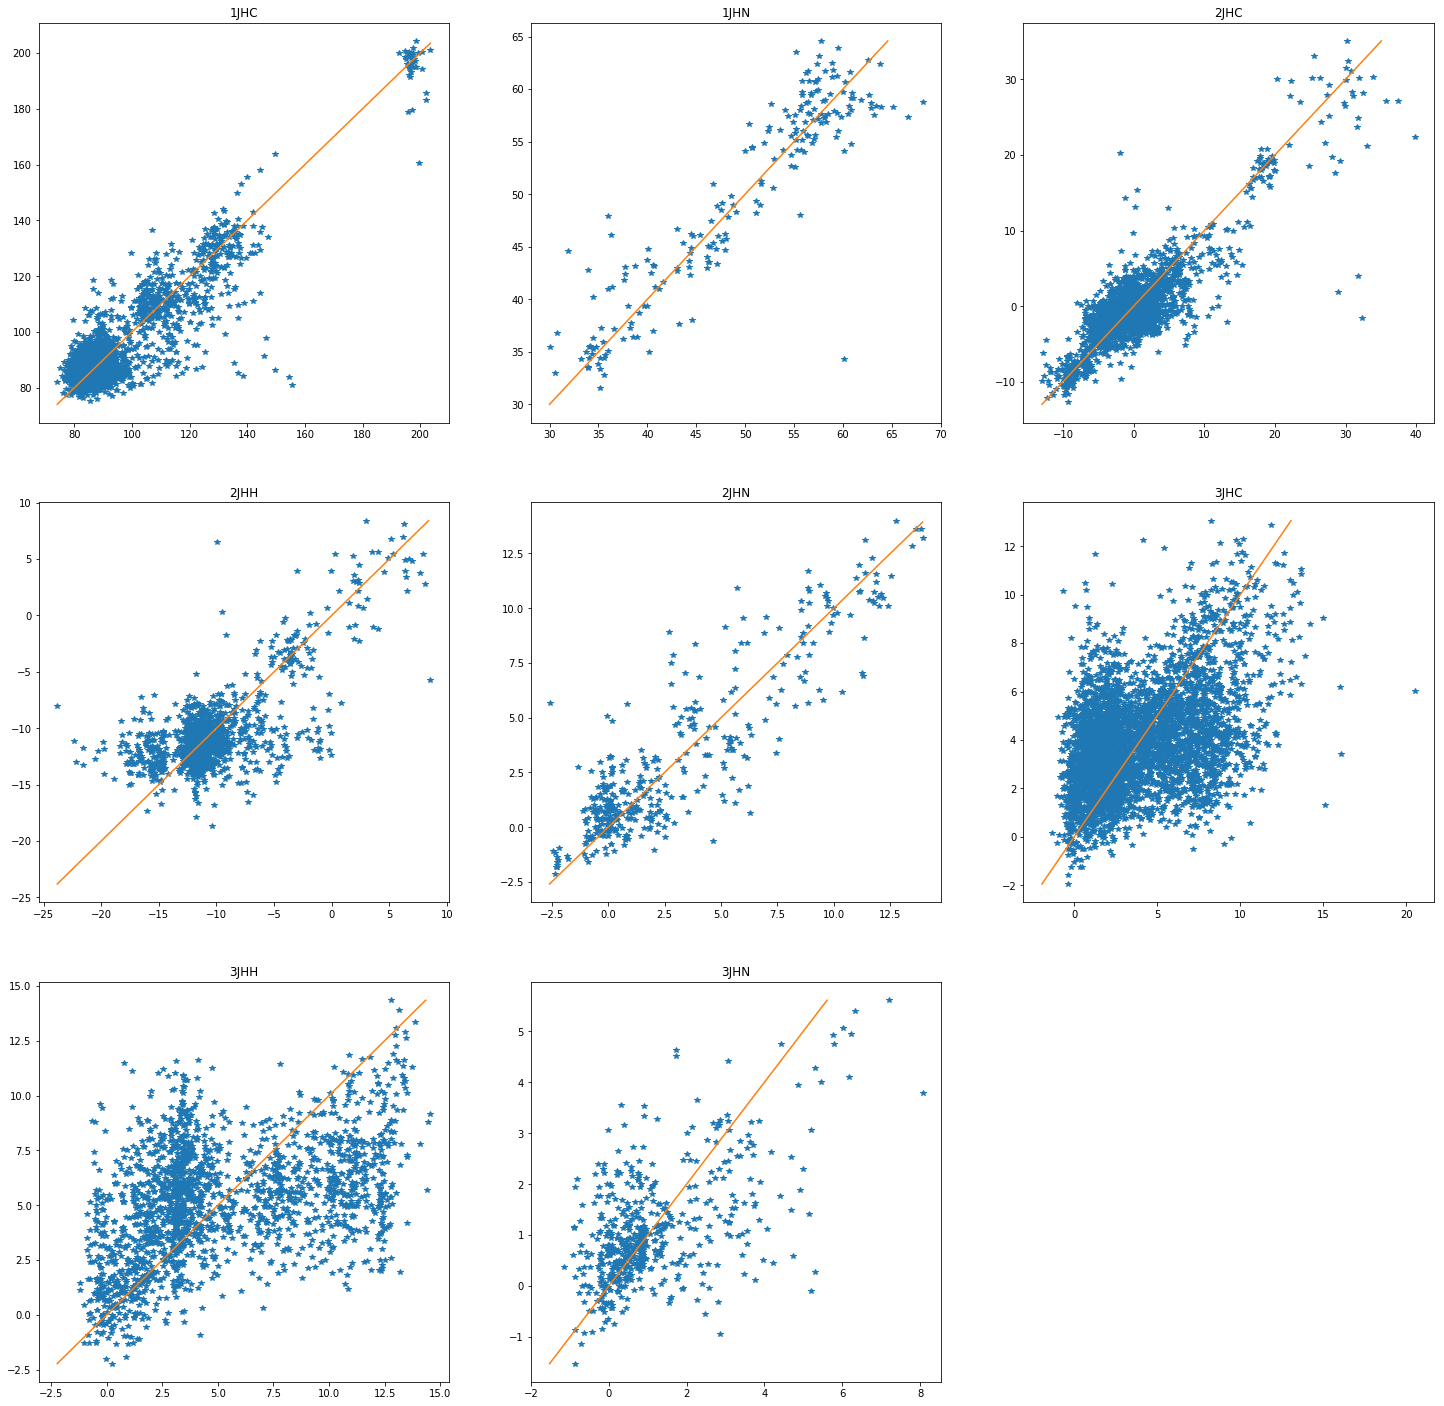

In [27]:
from models import XGBModel, LGBModel
from models import partition_data

def test(data):
    plt.figure(figsize=(25, 25))
    for i, t in enumerate(sorted(data.type.unique()), 1):
        data_df = data[data.type == t]
        train_df, test_df = partition_data(data_df)
        
        print(f'Training {len(train_df)} samples for {t}')

        model = LGBModel(dict(molecules=molecules, 
                              structures=structures),
                         dict(n_jobs=8,
                              max_depth=9,
                              boosting_type='gbdt',
                              num_leaves=128,
                              min_child_samples=20,
                              learning_rate=0.2,
                              n_estimators=1000,
                              reg_alpha=0.1,
                              reg_lambda=0.3,
                              subsample_freq = 1,
                              subsample = 0.9,
#                               verbose=500
                             ))
  
        model.fit(train_df, train_df)
        output, score = model.evaluate(test_df, test_df)
        print(f'{t} score: {score} (trained on {len(train_df)} elements)')
        plt.subplot(3, 3, i)
        plt.plot(test_df.scalar_coupling_constant, output, '*')
        mn = min(test_df.scalar_coupling_constant.min(), output.min())
        mx = min(test_df.scalar_coupling_constant.max(), output.max())
        plt.plot([mn, mx], [mn, mx])
        plt.title(t)
    plt.show()
        
test(labelled.head(50000))


In [ ]:
def train(data):
    models = {}
    for t in sorted(data.type.unique()):
        train_df = data[data.type == t]
        print(f'Training {len(train_df)} samples for {t}')
        model = LGBModel(dict(molecules=molecules, 
                              structures=structures),
                         dict(n_jobs=8,
                              max_depth=9,
                              boosting_type='gbdt',
                              num_leaves=128,
                              min_child_samples=20,
                              learning_rate=0.2,
                              n_estimators=1000,
                              reg_alpha=0.1,
                              reg_lambda=0.3,
                              subsample_freq = 1,
                              subsample = 0.9))
        models[t] = model
        model.fit(train_df, train_df)
    
    return models

models = train(labelled)

In [ ]:
def predict(data, models):
    out_df = None
    
    for t in sorted(data.type.unique()):
        predict_df = data[data.type == t]
        print(f'Predicting {len(predict_df)} samples for {t}')
        output = models[t].predict(predict_df)
        
        id = predict_df['id']
        out_df_coupling = pd.DataFrame(data={'id':id, 'scalar_coupling_constant':output}, index=predict_df.index)
        
        if out_df is None:
            out_df = out_df_coupling
        else:
            out_df = out_df.append(out_df_coupling).sort_index()

    return out_df.sort_index()
    
#%prun -s cumulative f(unlabelled.head(10000))
prediction = predict(unlabelled, models)

In [ ]:
prediction.head()

In [ ]:
prediction.to_csv('../data/pred.csv',index=False)